# Q1. Housing Price Prediction

Dataset Description: The data pertains to the houses found in each California district and some summary statistics about them based on the 1990 census data. It contains one instance per district block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people). 

The goal of this task is to design a regression model to predict the median house value conditioned upon a set of input attributes corresponding to a particular California district block. 

The attributes in the dataset are as follows; their names are self-explanatory: 
     

    longitude (continuous): One of the coordinates that are used to identify the California district block 
     

    latitude (continuous): One of the coordinates that are used to identify the California district block 
     

    housing_median_age (continuous): Average age of the house in California district block 
     

    total_rooms (continuous): Total number of rooms of all the houses in the California district block 
     

    total_bedrooms (continuous): Total number of bedrooms of all the houses in the California district block 
     

    population (continuous): Number of people residing in the district block 
     

    households (continuous): Number of families in the district block 
     

    median_income (continuous): Median income for households in the district block of houses (measured in tens of thousands of US Dollars)  
     

    ocean_proximity (categorical): Location of the house. Is it inland, near the bay, near the ocean, etc.  
     

    median_house_value.(continuous): Median house value within a district block (measured in US Dollars)

Our target variable will be median_house_value.  Use the rest of the fields mentioned above to predict the median_house_value. 

## Import Libraries
Import all necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

### b. Data Loading / Preprocessing

#### i. Loading

1. Load the California housing dataset using `pandas.read_csv()` function and store it in the variable (i.e., a pandas dataframe) named `df’.

2. The resulting data frame should have the shape (20640, 10) indicating that there are 20640 rows and 10 columns.

In [3]:
df=pd.read_csv('/content/sample_data/housing.csv')  

3. Find the missing values in the data frame. If any (i.e., even if one column in each instance / row has a missing value), drop the row using `pandas.DataFrame.dropna()` function. The resulting data frame should have the shape (20433, 10) indicating that there are 20433 rows and 10 columns.

In [4]:
df.dropna(inplace = True)

4. Create a data frame `corr_df` by dropping the columns latitude, longitude, and ocean_proximity using the `pandas.DataFrame.drop()` function. Use the Pearson correlation to find the correlation of each remaining feature in the `corr_df` with the target variable `median_house_value` using the function `pandas.DataFrame.corrwith()`. 

In [5]:
corr_df = df.drop(["latitude", "longitude", "ocean_proximity"], axis=1)

5. Create a data frame `X` of features (by dropping the column `median_house_value` from the original data frame) using the `pandas.DataFrame.drop()` function. Create a Series object of targets `Y` (by only considering the `median_house_value` column from the original data frame (Do NOT use the `corr_df` data frame in this step. Use the data frame which was obtained as a result of step 3 above). 

In [6]:
X = df.drop("median_house_value", axis=1)
Y = df["median_house_value"]

#### ii. Data Visualization

1. Use `pandas.DataFrame.hist(bins = 50)` function for visualizing the variation on the columns housing_median_age, total_rooms, total_bedrooms, population, household, median_income and median_house_value. Plot each histogram as a separate subplot.

array([[<Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>],
       [<Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>],
       [<Axes: title={'center': 'median_house_value'}>, <Axes: >,
        <Axes: >]], dtype=object)

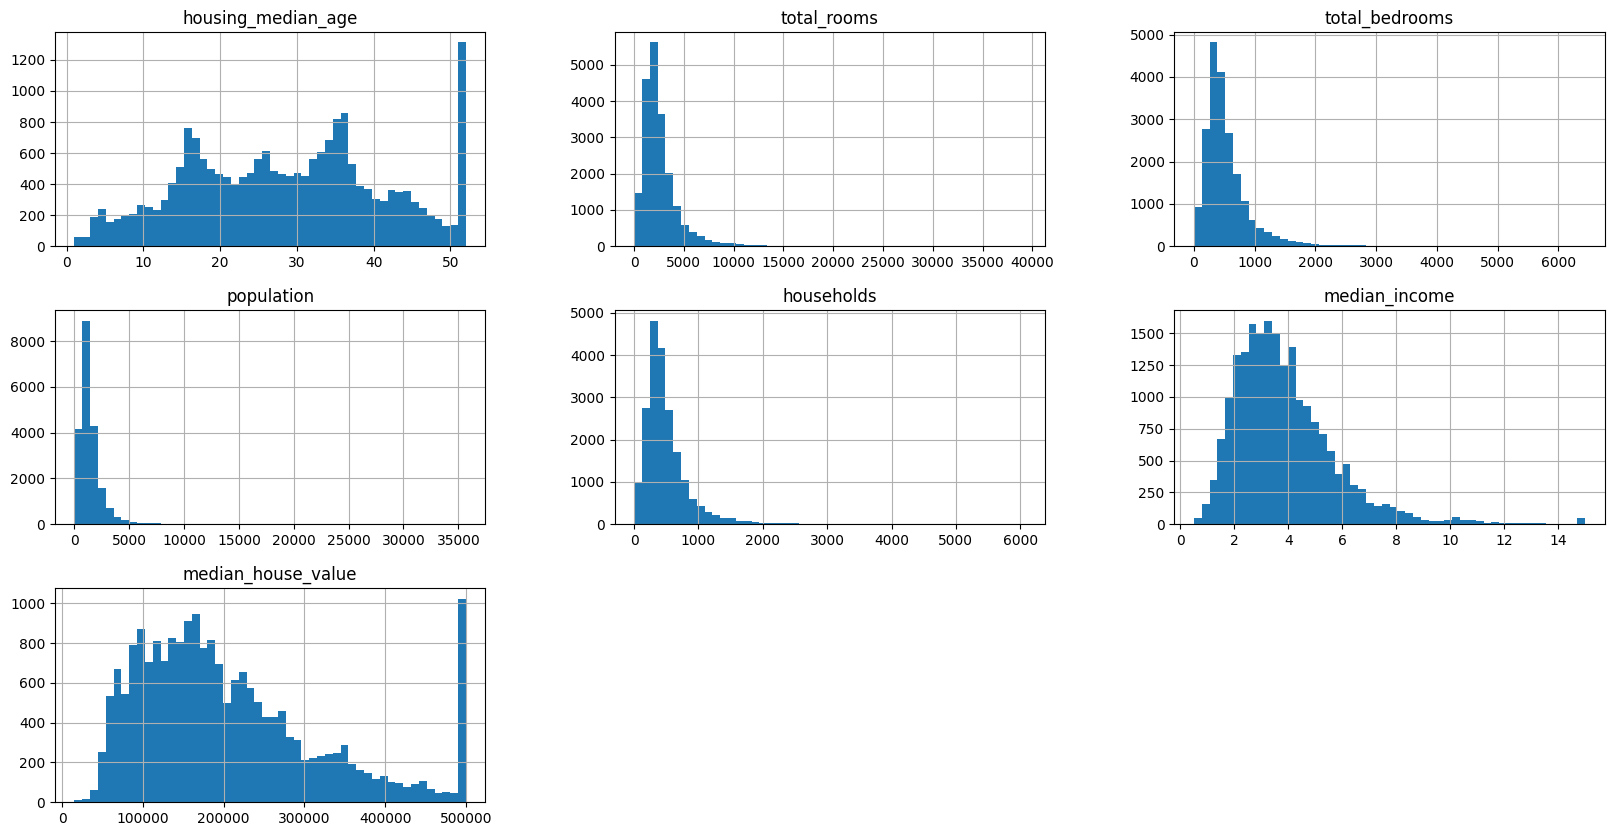

In [14]:
corr_df.hist(bins=50, figsize=(20,10))

2. Use `pandas.dataframe.describe()` function to find the mean, median and standard deviations for each feature and report in the jupyter notebook.

In [8]:
# use describe() to get summary statistics of the dataframe
summary_stats = df.describe()

# extract mean, median, and std for each feature
means = summary_stats.loc['mean']
medians = summary_stats.loc['50%']
stds = summary_stats.loc['std']

# print results
print("Means:\n", means)
print("\nMedians:\n", medians)
print("\nStandard Deviations:\n", stds)


Means:
 longitude               -119.570689
latitude                  35.633221
housing_median_age        28.633094
total_rooms             2636.504233
total_bedrooms           537.870553
population              1424.946949
households               499.433465
median_income              3.871162
median_house_value    206864.413155
Name: mean, dtype: float64

Medians:
 longitude               -118.4900
latitude                  34.2600
housing_median_age        29.0000
total_rooms             2127.0000
total_bedrooms           435.0000
population              1166.0000
households               409.0000
median_income              3.5365
median_house_value    179700.0000
Name: 50%, dtype: float64

Standard Deviations:
 longitude                  2.003578
latitude                   2.136348
housing_median_age        12.591805
total_rooms             2185.269567
total_bedrooms           421.385070
population              1133.208490
households               382.299226
median_income          

3. Use `pandas.get_dummies` to convert categorical variables into dummy /one-hot encoding. In this case the categorical column is ocean_proximity 

In [9]:
# Create dummy variables for categorical variable 'ocean_proximity'
X = pd.get_dummies(X, columns=['ocean_proximity'], prefix=['ocean_proximity'])

# Print first few rows of the updated X dataframe
print(X.head())


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  ocean_proximity_<1H OCEAN  \
0       322.0       126.0         8.3252                          0   
1      2401.0      1138.0         8.3014                          0   
2       496.0       177.0         7.2574                          0   
3       558.0       219.0         5.6431                          0   
4       565.0       259.0         3.8462                          0   

   ocean_proximity_INLAND  ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                       0                  

#### iii. Data Splitting

1. Split data into training and test sets using the sklearn `train_test_split()` function. Perform 70-30 distribution i.e. 70% training and 30% testing. The result of your data split should yield 4 separate data frames `X_train, X_test, y_train, y_test`. (respectively, the training features, testing features, training targets and testing target).

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

#### iv. Data Scaling

1. Use the `StandardScaler()` to instantiate the standard scaler class. Note: You will need two separate scaler objects, one to scale the features, another to scale the target values. 

In [11]:
# instantiate scaler for features
scaler_X = StandardScaler()

# instantiate scaler for target variable
scaler_y = StandardScaler()

2. For each scaler, employ the `fit_transform()` function (only on the training  features, training targets) of the scaler to retrieve the new (scaled) version of the data. Store them in `X_train`, and `y_train` again

In [12]:
# fit and transform the training data with the scalers
X_train = scaler_X.fit_transform(X_train)
y_train = y_train.values.reshape(-1, 1)
y_train = scaler_y.fit_transform(y_train)


3. Scale the `X_test` and `y_test` as well and store the scaled values back in `X_test` and `y_test`. (i.e., use the appropriate “fitted” scaler above to “transform” the test data. Note: the function to be employed in this case is `transform()` as opposed to `fit_transform()`).  
Henceforth, `X_train, y_train, X_test, y_test` will refer to the scaled data unless stated otherwise.

In [13]:
X_test = scaler_X.fit_transform(X_test)
y_test = y_test.values.reshape(-1, 1)
y_test = scaler_y.fit_transform(y_test)

4. Use `pandas.DataFrame.hist(bins = 50)` function for visualizing the variation of numerical attributes housing_median_age, total_rooms, total_bedrooms, population, household, median_income and median_house_value for the `X_train` and `y_train` dataset (similar to step b.ii.1 above). Once again, plot each histogram as a separate subplot. 

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_rooms'}>],
       [<Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>],
       [<Axes: title={'center': 'ocean_proximity_<1H OCEAN'}>,
        <Axes: title={'center': 'ocean_proximity_INLAND'}>,
        <Axes: title={'center': 'ocean_proximity_ISLAND'}>,
        <Axes: title={'center': 'ocean_proximity_NEAR BAY'}>],
       [<Axes: title={'center': 'ocean_proximity_NEAR OCEAN'}>, <Axes: >,
        <Axes: >, <Axes: >]], dtype=object)

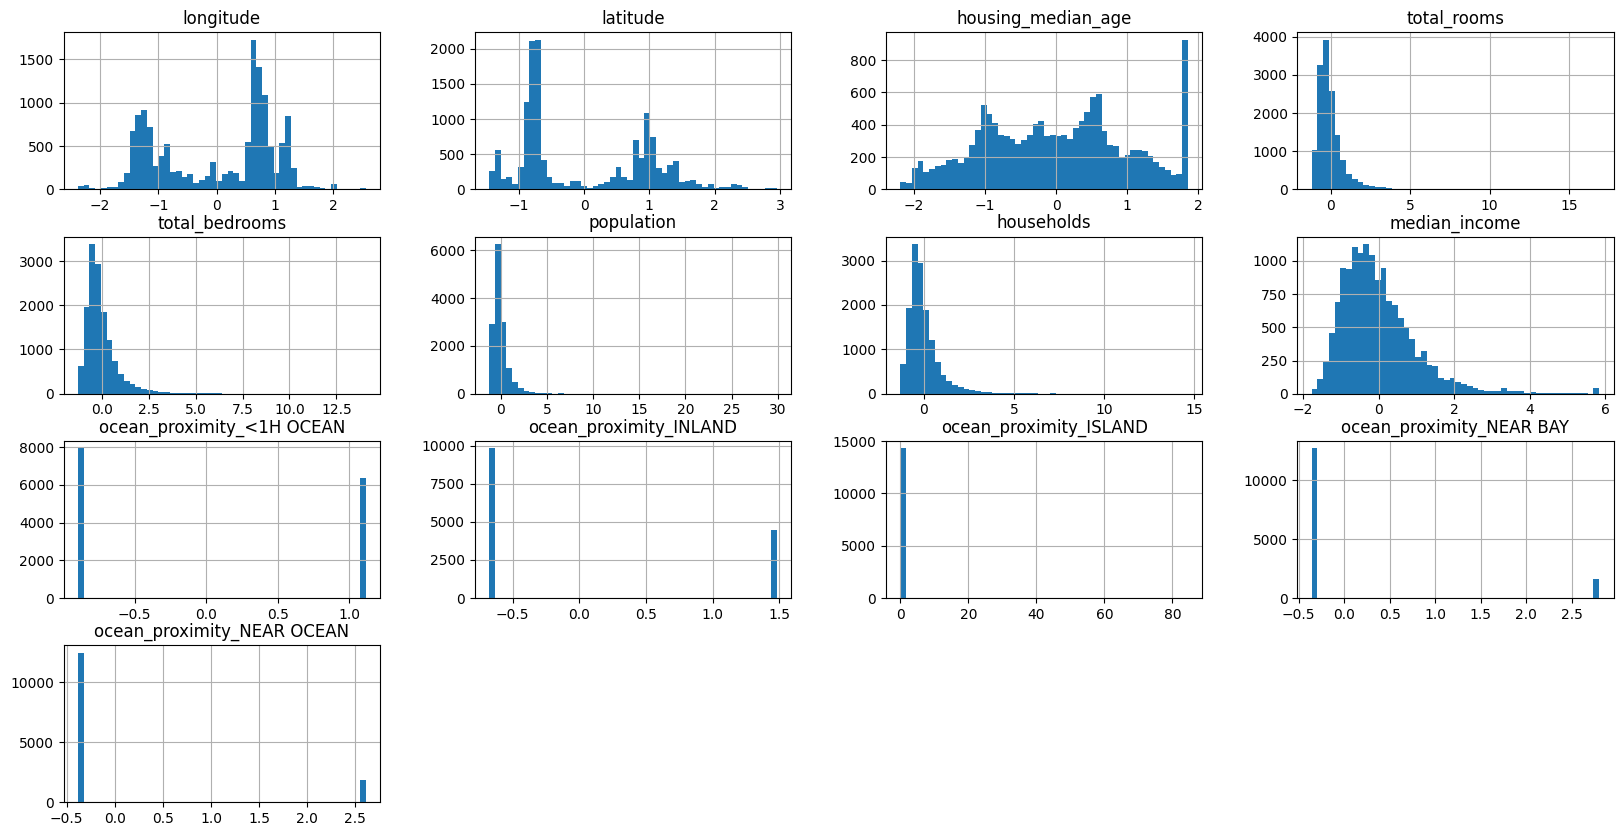

In [21]:
samp=pd.DataFrame(X_train,columns = ['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','ocean_proximity_<1H OCEAN','ocean_proximity_INLAND','ocean_proximity_ISLAND','ocean_proximity_NEAR BAY','ocean_proximity_NEAR OCEAN'])
samp.hist(bins=50, figsize=(20,10))

### c. Modelling

#### i. Employ Linear Regression from sklearn.linear_model, and instantiate the model.

In [22]:
Lin_Reg=LinearRegression()

#### ii. Once instantiated, `fit()` the model using the scaled `X_train, y_train` data.

In [23]:
Lin_Reg.fit(X_train,y_train)

LinearRegression()

#### iii. Employ the `predict()` function to obtain predictions on `X_test`. Store the predictions in a variable named `y_preds`. Note: Since the model has been trained on scaled data (i.e., both features and targets, the predictions will also be in the “scaled” space. We need to transform the predictions back to the original space). 

In [24]:
y_preds = Lin_Reg.predict(X_test)

#### iv. Use `inverse_transform()` function to convert the normalized data (`y_preds` ) to original scale. Store the transformed values back into `y_preds`.

In [26]:
y_preds = scaler_y.inverse_transform(y_preds)

In [27]:
y_preds

array([[202986.7988005 ],
       [144906.11253201],
       [206813.04114517],
       ...,
       [143592.95179054],
       [ 50113.24846933],
       [ 94155.18108869]])

#### v. Perform PCA on the features (`X_train`) and set `n_component` as 2.

In [28]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

1. Show a scatter plot where on the x-axis we plot the first PCA component and second component on the y-axis.

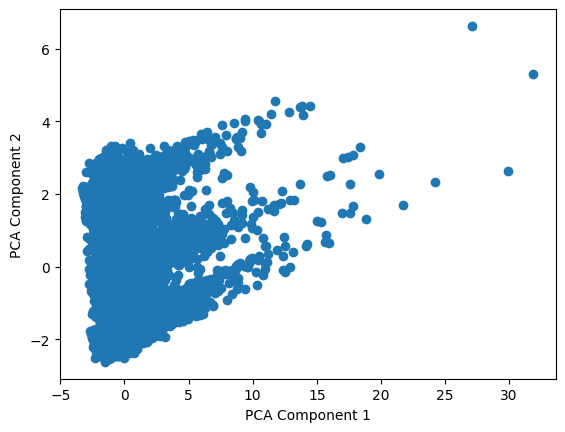

In [29]:
plt.scatter(X_train_pca[:,0], X_train_pca[:,1])
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

2. Calculate the total percentage of variance captured by the 2 PCA components using `pca.explained_variance_ratio_`. Also, report the strength of each PCA component using `pca.singular_values_`.

In [30]:
# calculate explained variance ratio and singular values
explained_var_ratio = pca.explained_variance_ratio_
singular_vals = pca.singular_values_

# calculate total variance captured by the 2 PCA components
total_var = sum(explained_var_ratio[:2]) * 100

# print results
print(f"Total variance captured by 2 PCA components: {total_var:.2f}%")
print(f"Strength of the first PCA component: {singular_vals[0]:.2f}")
print(f"Strength of the second PCA component: {singular_vals[1]:.2f}")


Total variance captured by 2 PCA components: 49.85%
Strength of the first PCA component: 236.62
Strength of the second PCA component: 191.60


### d. Evaluation

#### i. Plot a scatter plot using matplotlib.pyplot.scatter function. Plot the predicted median house values on the y-axis vs the actual median house values on the x-axis

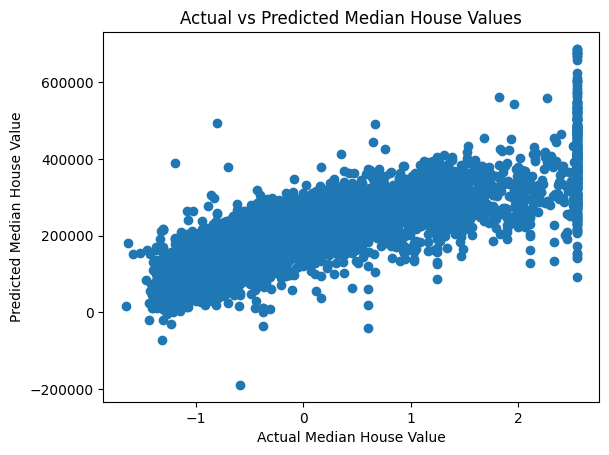

In [31]:
plt.scatter(y_test, y_preds)
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs Predicted Median House Values")
plt.show()

#### ii. Calculate MAPE, RMSE and R2 for the model and report them in the following table.  
Hint: for RMSE set the squared parameter to False.

In [32]:
from prettytable import PrettyTable
# MAPE
mape = mean_absolute_percentage_error(y_test, y_preds) * 100

# RMSE
rmse = mean_squared_error(y_test, y_preds, squared=False)

# R2
r2 = r2_score(y_test, y_preds)


# Create a table instance
table = PrettyTable()

# Add columns
table.add_column("Metric", ["MAPE", "RMSE", "R2"])
table.add_column("Value", [mape, rmse, r2])

# Print the table
print(table)


+--------+--------------------+
| Metric |       Value        |
+--------+--------------------+
|  MAPE  | 134610169.97205055 |
|  RMSE  | 225622.80352148364 |
|   R2   | -50905649467.89402 |
+--------+--------------------+
